# Домашнее задание к лекции «Feature Selection» обновленное

## **Цель:**  
Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.  
## **Описание задания:**  
В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

### **Этапы работы:**

#### 1. Сгенерируйте данные с помощью кода:  
from sklearn.datasets import make_classification  
x_data_generated, y_data_generated = make_classification(scale=1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
#from sklearn.model_selection import train_test_split

#from sklearn.decomposition import PCA
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.neighbors import NeighborhoodComponentsAnalysis

#from sklearn.feature_selection import SequentialFeatureSelector
#from sklearn.neighbors import KNeighborsClassifier

#from sklearn.feature_selection import RFE
#from sklearn.svm import SVR

In [2]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1, random_state = 30)

In [3]:
x_data_generated.shape

(100, 20)

In [4]:
y_data_generated.shape

(100,)

#### 2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [6]:
cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='accuracy').mean()

0.8300000000000001

In [7]:
cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='precision').mean()

0.874920634920635

In [8]:
cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='recall').mean()

0.8

In [9]:
scores = cross_val_score(LogisticRegression(), x_data_generated, y_data_generated)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.83 accuracy with a standard deviation of 0.07


## 3. Используйте статистические методы для отбора признаков:  
a) Выберите признаки на основе матрицы корреляции.  
b) Отсеките низковариативные признаки (VarianceThreshold).  
c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [10]:
X = pd.DataFrame(x_data_generated)
y = pd.DataFrame(y_data_generated, columns = ['Target'])
df = pd.concat([X, y], axis = 1)

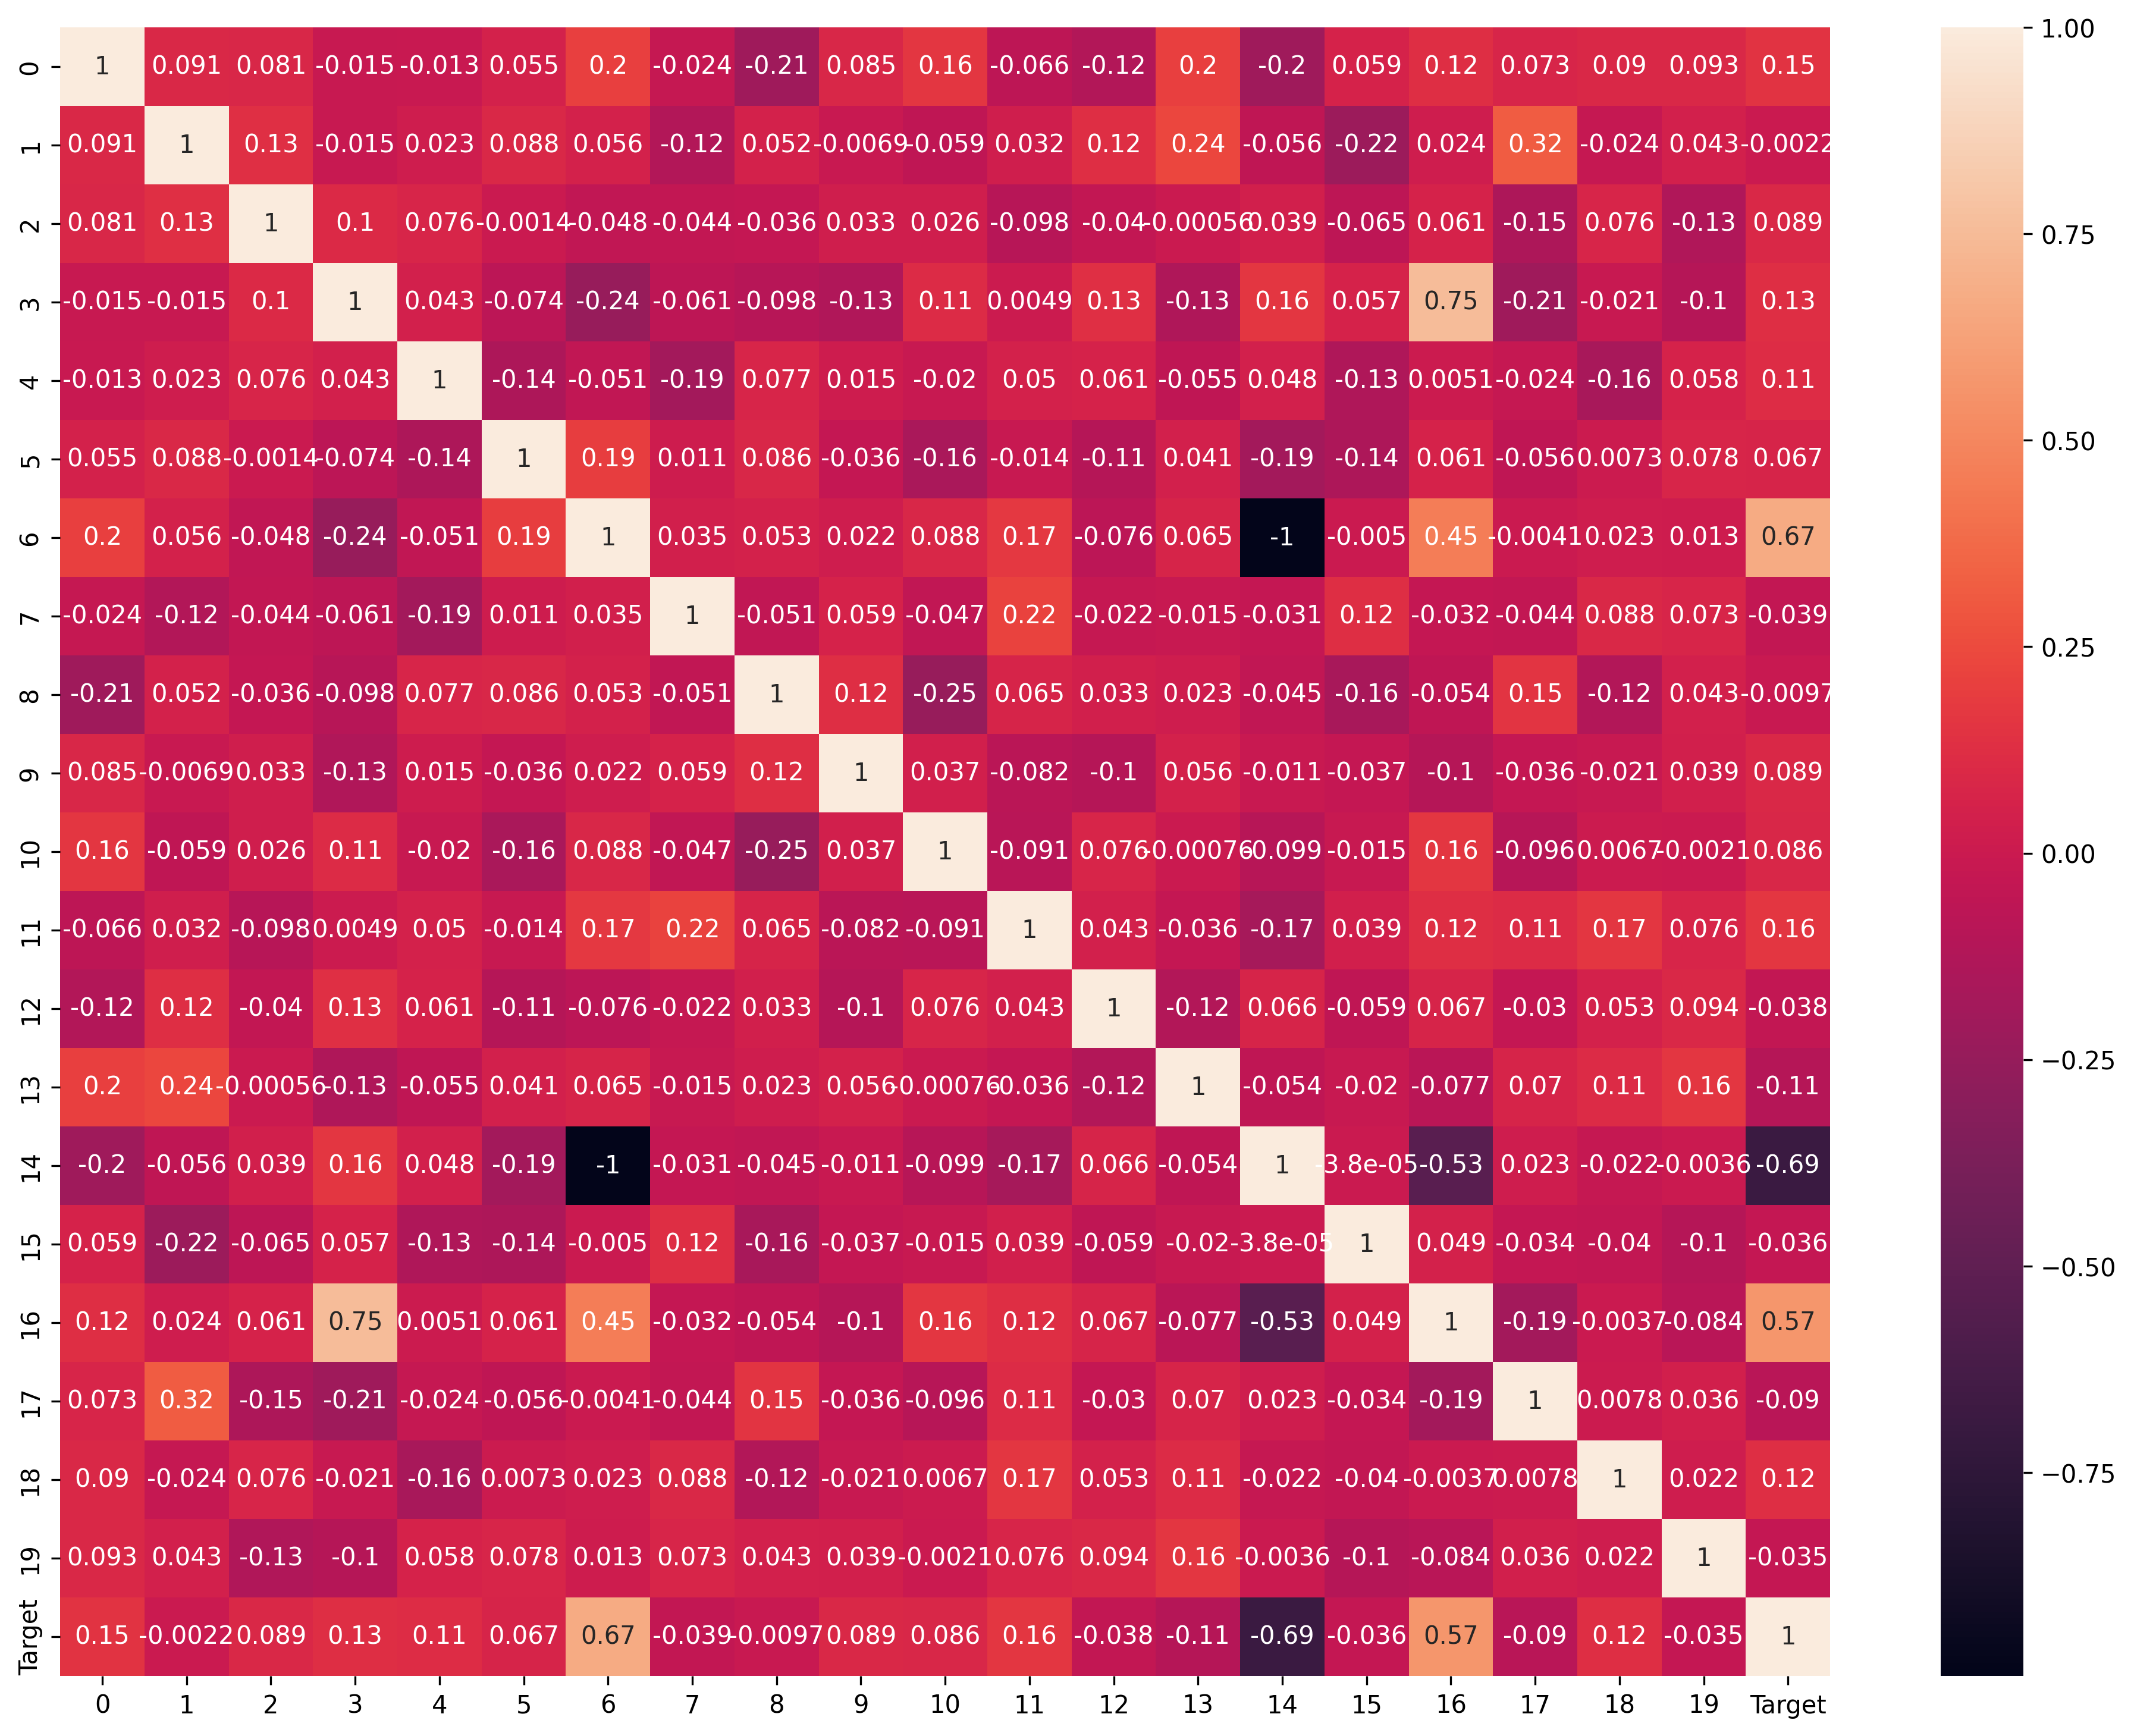

In [11]:
corr = df.corr()
plt.figure(figsize=(16,12), dpi = 300)
sns.heatmap(corr,annot=True)
plt.show()

##### Оставляем те признаки, которые а) коррелируют между собой менее 0.5 по модулю и б) предпочтение оставляем тем признакам, которые коррелируют с Target положительно и сильнее. Например, из признаков с названиями колонок 3 и 16 оставляем под номером 16.  
Итого: уходят только признаки под номерами 3 и 14.

In [12]:
chosen_features = [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]

In [13]:
# путём подбора величины threshold отсекли ещё 11 признаков.
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = 0.95)
X_stat = pd.DataFrame(selector.fit_transform(df.iloc[:, chosen_features]))

In [14]:
X_stat.head()

,0,1,2,3,4,5,6
0,1.551292,-2.216002,-0.448078,1.032672,1.070274,-0.721689,0.002634
1,-0.645309,0.361051,0.007178,0.299131,-1.469280,1.059771,0.782118
2,3.494883,-0.979285,-1.671784,0.220692,-2.171918,1.670343,-0.349487
3,1.378802,-0.410106,-1.616141,0.242932,0.491429,0.044880,-0.201538
4,-0.289356,-0.039736,1.292504,-0.107749,-0.767760,0.434152,1.999527


In [15]:
cross_val_score(LogisticRegression(), X_stat, y_data_generated, scoring='accuracy').mean()

0.8400000000000001

In [16]:
cross_val_score(LogisticRegression(), X_stat, y_data_generated, scoring='precision').mean()

0.8311599511599512

In [17]:
cross_val_score(LogisticRegression(), X_stat, y_data_generated, scoring='recall').mean()

0.8800000000000001

In [18]:
scores = cross_val_score(LogisticRegression(), X_stat, y_data_generated)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.84 accuracy with a standard deviation of 0.05


#### **Вывод:** результаты после урезания признаков до 6, в целом, улучшились, хотя precision (способность различать классы) немного упал.

#### 4. Осуществите отбор признаков на основе дисперсионного анализа:  
a) Выберите 5 лучших признаков с помощью скоринговой функции [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) для классификации и команды f_classif (SelectKBest(f_classif, k=5)).  
b) Повторите п. 2 на отобранных признаках.

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

In [20]:
X_anova = SelectKBest(f_classif, k=5).fit_transform(x_data_generated, y_data_generated)
X_anova.shape

(100, 5)

In [21]:
cross_val_score(LogisticRegression(), X_anova, y_data_generated, scoring='accuracy').mean()

0.85

In [22]:
cross_val_score(LogisticRegression(), X_anova, y_data_generated, scoring='precision').mean()

0.8535020535020535

In [23]:
cross_val_score(LogisticRegression(), X_anova, y_data_generated, scoring='recall').mean()

0.8800000000000001

In [24]:
scores = cross_val_score(LogisticRegression(), X_anova, y_data_generated)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.85 accuracy with a standard deviation of 0.03


#### **Вывод:** результаты ещё больше улучшились.

#### 5. Отбор с использованием моделей:  
a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию ([SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)). Используйте L1 регуляризацию.  
b) Реализуйте отбор признаков с помощью модели [RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) и встроенного атрибута feature_importances_.  
c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

### Далее немного изменим порядок выполнения задания: выберем признаки и посчитаем точность отдельно по каждому методу

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression(random_state = 30)

In [27]:
model.fit(x_data_generated, y_data_generated)

LogisticRegression(random_state=30)

In [28]:
pd.DataFrame(model.coef_.T).sort_values(0, ascending=False) # преобразовали и отсортировали по убыванию важности

,0
16,1.443989
6,1.438339
9,0.764402
3,0.538306
18,0.452597
4,0.433265
11,0.405971
2,0.254677
1,0.158737
5,0.134671


In [29]:
# выбираем первые 7 признаков из датафрейма выше 
features = pd.DataFrame(model.coef_.T).sort_values(0, ascending=False).head(7)

In [30]:
features.T.columns.to_list()

[16, 6, 9, 3, 18, 4, 11]

In [31]:
X_logreg = X.iloc[:,features.T.columns.to_list()]

In [32]:
X_logreg.head()

,16,6,9,3,18,4,11
0,1.070274,-2.216002,-0.070955,2.550649,-1.496821,-0.325582,-0.448078
1,-1.469280,0.361051,0.478315,-1.743888,0.745786,0.436950,0.007178
2,-2.171918,-0.979285,2.066461,-1.585963,-1.245630,-0.035922,-1.671784
3,0.491429,-0.410106,0.089023,0.772965,0.163812,-0.917017,-1.616141
4,-0.767760,-0.039736,1.026883,-0.761520,-0.057109,-0.990505,1.292504


In [33]:
from sklearn.feature_selection import SelectFromModel

In [34]:
selector = SelectFromModel(estimator=LogisticRegression(penalty = 'l1', solver ='liblinear'))\
            .fit(X_logreg, y_data_generated)
selector.estimator_.coef_

array([[2.31684427, 2.26488743, 0.63626   , 0.        , 0.27907576,
        0.32565286, 0.25642684]])

##### Оставляем только признаки в колонках с номерами 16, 6, 9

In [35]:
X_logreg = X_logreg.loc[:,[16,6,9]]

In [36]:
cross_val_score(LogisticRegression(), X_logreg, y_data_generated, scoring='accuracy').mean()

0.8800000000000001

In [37]:
cross_val_score(LogisticRegression(), X_logreg, y_data_generated, scoring='precision').mean()

0.8847863247863247

In [38]:
cross_val_score(LogisticRegression(), X_logreg, y_data_generated, scoring='recall').mean()

0.8800000000000001

In [39]:
scores = cross_val_score(LogisticRegression(), X_logreg, y_data_generated)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.88 accuracy with a standard deviation of 0.02


#### А теперь RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model_rf = RandomForestClassifier(max_depth=3, random_state=30)
model_rf.fit(x_data_generated, y_data_generated)

RandomForestClassifier(max_depth=3, random_state=30)

In [42]:
model_rf.feature_importances_

array([0.01999514, 0.01189377, 0.05101436, 0.04982221, 0.03596645,
       0.0124538 , 0.22951219, 0.01890409, 0.01910984, 0.02124834,
       0.01048587, 0.032931  , 0.03258241, 0.0274818 , 0.22423133,
       0.0200293 , 0.12360217, 0.01586515, 0.03147693, 0.01139386])

In [43]:
pd.DataFrame(model_rf.feature_importances_.T).sort_values(0, ascending=False)

,0
6,0.229512
14,0.224231
16,0.123602
2,0.051014
3,0.049822
4,0.035966
11,0.032931
12,0.032582
18,0.031477
13,0.027482


In [44]:
# выбираем первые 3 признаков из датафрейма выше 
features_rf = pd.DataFrame(model_rf.feature_importances_.T).sort_values(0, ascending=False).head(3)

In [45]:
features_rf

,0
6,0.229512
14,0.224231
16,0.123602


In [46]:
X_rf = X.iloc[:,features_rf.T.columns.to_list()]

In [47]:
X_rf.head()

,6,14,16
0,-2.216002,1.782014,1.070274
1,0.361051,-0.169307,-1.469280
2,-0.979285,1.034718,-2.171918
3,-0.410106,0.302369,0.491429
4,-0.039736,0.105511,-0.767760


In [48]:
cross_val_score(LogisticRegression(), X_rf, y_data_generated, scoring='accuracy').mean()

0.8700000000000001

In [49]:
cross_val_score(LogisticRegression(), X_rf, y_data_generated, scoring='precision').mean()

0.8550893550893551

In [50]:
cross_val_score(LogisticRegression(), X_rf, y_data_generated, scoring='recall').mean()

0.9

In [51]:
scores = cross_val_score(LogisticRegression(), X_rf, y_data_generated)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.87 accuracy with a standard deviation of 0.02


#### 6. Перебор признаков:  
a) [SequentialFeatureSelector](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html).  
b) Повторите п. 2 на отобранных признаках.

In [52]:
# В качестве эстиматора выбираем KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=4)
sfs = SequentialFeatureSelector(knn, n_features_to_select=4)

In [54]:
sfs.fit(x_data_generated, y_data_generated)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=4),
                          n_features_to_select=4)

In [55]:
sfs.get_support()

array([False, False, False,  True, False, False,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False])

In [56]:
X_sfs = sfs.transform(x_data_generated)

In [57]:
cross_val_score(LogisticRegression(), X_sfs, y_data_generated, scoring='accuracy').mean()

0.86

In [58]:
cross_val_score(LogisticRegression(), X_sfs, y_data_generated, scoring='precision').mean()

0.8523115773115773

In [59]:
cross_val_score(LogisticRegression(), X_sfs, y_data_generated, scoring='recall').mean()

0.8800000000000001

In [60]:
scores = cross_val_score(LogisticRegression(), X_sfs, y_data_generated)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.86 accuracy with a standard deviation of 0.04


#### А теперь попробуем в качестве эстиматора LogisticRegression

In [61]:
lr = LogisticRegression()
sfs_lr = SequentialFeatureSelector(lr, n_features_to_select=6)

In [62]:
sfs_lr.fit(x_data_generated, y_data_generated)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=6)

In [63]:
sfs_lr.get_support()

array([False, False,  True, False,  True, False, False, False, False,
        True, False, False, False,  True,  True, False,  True, False,
       False, False])

In [64]:
X_sfs = sfs_lr.transform(x_data_generated)

In [65]:
cross_val_score(LogisticRegression(), X_sfs, y_data_generated, scoring='accuracy').mean()

0.9299999999999999

In [66]:
cross_val_score(LogisticRegression(), X_sfs, y_data_generated, scoring='precision').mean()

0.9492307692307692

In [67]:
cross_val_score(LogisticRegression(), X_sfs, y_data_generated, scoring='recall').mean()

0.9199999999999999

In [68]:
scores = cross_val_score(LogisticRegression(), X_sfs, y_data_generated)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.93 accuracy with a standard deviation of 0.04


#### 7. Сформулируйте выводы по проделанной работе:  
a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

|Method for Features| Number of features| Av. Accuracy|
|:---|:--:|:--:|
|Pure Logistic Regression|20|0.83|
|Statistic|7|0.84
|Variance - ANOVA|5|0.85
|LogReg+SelectFromMethod+LogReg|3|0.88|
|RandomForest|3|0.87|
|SequentialFeatureSelection+KNN|4|0.86|
|SequentialFeatureSelection+LogReg|6|0.93|

### **Вывод:**  
Наилучший результат по всем метрикам показал метод с выбором признаков методом Sequential Feature Selection с эстиматором Logistic Regression.